<a href="https://colab.research.google.com/github/jay-kanakia/Deep-Learning/blob/main/6_vanishing_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import make_moons

In [3]:
X,y=make_moons(n_samples=250,noise=0.05,random_state=42)

[]

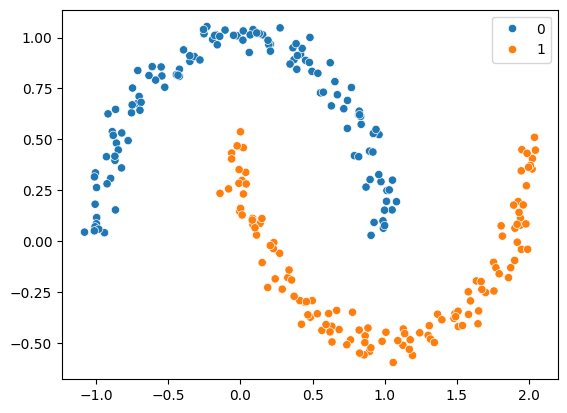

In [4]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
plt.plot()

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
model=Sequential()
model.add(Dense(10,activation='sigmoid',input_dim=X_train.shape[1]))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
old_weights=model.get_weights()[0]

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(X_train,y_train,batch_size=8,epochs=200,validation_split=0.2)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4839 - loss: 0.7254 - val_accuracy: 0.5250 - val_loss: 0.6985
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5152 - loss: 0.6994 - val_accuracy: 0.5250 - val_loss: 0.6934
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4972 - loss: 0.6993 - val_accuracy: 0.5250 - val_loss: 0.6921
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4994 - loss: 0.6954 - val_accuracy: 0.5250 - val_loss: 0.6918
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4723 - loss: 0.6967 - val_accuracy: 0.5250 - val_loss: 0.6919
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5244 - loss: 0.6923 - val_accuracy: 0.5250 - val_loss: 0.6920
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4253 - loss: 0.6974 - val_accuracy: 0.5250 - val_loss: 0.6924
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4989 - loss: 0.6931 - val_accuracy: 0.5250

In [15]:
new_weights=model.get_weights()[0]

In [18]:
model.optimizer.get_config()['learning_rate']

0.0010000000474974513

In [19]:
(new_weights-old_weights)/0.001

array([[ -275.19815 ,    12.316018,   100.81586 ,   261.47165 ,
          518.26025 ,   -30.503838,  -311.33755 ,   601.69275 ,
          218.44461 ,    84.25298 ],
       [ 1681.6437  ,  1543.8892  , -1597.9683  ,   388.99216 ,
        -1361.5897  , -1374.424   ,  1244.9617  , -1430.6218  ,
        -1642.2228  , -1511.1938  ]], dtype=float32)

In [20]:
((new_weights-old_weights)/old_weights)*100

array([[ 2.0770718e+02, -2.6962020e+00,  2.9577133e+01, -1.4277538e+02,
        -2.8711093e+02, -6.3737154e+00,  7.6397223e+02, -1.3832401e+02,
         2.3563197e+02,  2.1219648e+01],
       [-5.2664270e+02, -1.1785524e+03,  8.6964758e+02,  7.1165474e+01,
         2.9883154e+02,  2.9796869e+02,  2.2460515e+02, -7.2160630e+03,
        -4.9230933e+02,  3.8973395e+02]], dtype=float32)

In [25]:
model1=Sequential()
model1.add(Dense(10,activation='relu',input_dim=X_train.shape[1]))
model1.add(Dense(10,activation='relu'))
model1.add(Dense(10,activation='relu'))
model1.add(Dense(10,activation='relu'))
model1.add(Dense(10,activation='relu'))
model1.add(Dense(10,activation='relu'))
model1.add(Dense(10,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701 (2.74 KB)

 Trainable params: 701 (2.74 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model1.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [30]:
old=model1.get_weights()[0]

In [31]:
model1.fit(X_train,y_train,validation_split=0.2,epochs=200)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.5049 - loss: 0.6933 - val_accuracy: 0.5250 - val_loss: 0.6922
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5307 - loss: 0.6921 - val_accuracy: 0.5250 - val_loss: 0.6914
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5524 - loss: 0.6912 - val_accuracy: 0.5250 - val_loss: 0.6906
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5290 - loss: 0.6909 - val_accuracy: 0.5250 - val_loss: 0.6896
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5046 - loss: 0.6906 - val_accuracy: 0.7250 - val_loss: 0.6883
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7219 - loss: 0.6882 - val_accuracy: 0.7500 - val_loss: 0.6861
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7194 - loss: 0.6874 - val_accuracy: 0.9000 - val_loss: 0.6835
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8428 - loss: 0.6836 - val_accuracy: 0.9250 - val_loss

In [34]:
new=model1.get_weights()[0]

In [36]:
model1.optimizer.get_config()['learning_rate']

0.0010000000474974513

In [37]:
(old-new)/0.001

array([[  22.308594,  268.56516 , -122.00569 ,   24.880884,  -73.854706,
         296.5837  ,  156.89847 , -115.47436 ,  -54.89105 ,  -49.443436],
       [ -66.59257 , -224.9525  ,   83.80663 ,  -59.39036 ,   58.84221 ,
        -155.62596 ,  -47.023815,  426.07083 ,  257.73154 ,   39.993435]],
      dtype=float32)

In [38]:
((old-new)/old)*100

array([[  20.862753,  -67.65092 ,  -18.069706,    5.840892,   50.659096,
         -52.937298,  -83.088745, 5225.4575  ,   -8.278788,   57.171867],
       [ -14.868405,   69.914856,  -11.900139,  -23.5638  ,  -55.203278,
         -82.69877 ,   39.851185, -161.94533 ,  105.44885 ,  -47.53528 ]],
      dtype=float32)